In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import cv2
import json 
from baxter_fk import Baxter_FK

In [2]:
### example data
bl_to_cam = np.array([[-0.69424283,  0.71886827, -0.03543021,  0.60916084],
                       [ 0.05950852,  0.10638853,  0.9925423 , -0.31308031],
                       [ 0.71727654,  0.68695698, -0.11663826,  0.23716486],
                       [ 0.        ,  0.        ,  0.        ,  1.        ]])

# [s0,s1,e0,e1,w0,w1,w2]
joint_angle = [0.14460152387619019, -1.0594618320465088, 0.08743643015623093,
               1.5528779029846191, -0.634137749671936, 0.6500563025474548, -0.02112489938735962]

In [3]:
def get_camera_matrix():
    K = np.array([[-554.25625842,    0.        ,  320.        ],
                   [   0.        , -554.25625842,  240.        ],
                   [   0.        ,    0.        ,    1.        ]])
    return K

def get_coor_by_P(v_pos):
    
    # find the field of view for x and y axis
    P = get_camera_matrix()
    
    x = P @ v_pos.reshape((3,1))
    x = x/x[2]
    x.astype(int)

    return (int(x[0]),int(x[1]))

def dehomogenize_3d(vec):
    vec = vec.reshape((-1,1))
    vec = vec/vec[3]
    return vec[:3]
def dehomogenize_2d(vec):
    vec = vec.reshape((-1,1))
    vec = vec/vec[2]
    return vec[:2]


In [4]:
baxter = Baxter_FK('baxter_ee_keypoint.json')

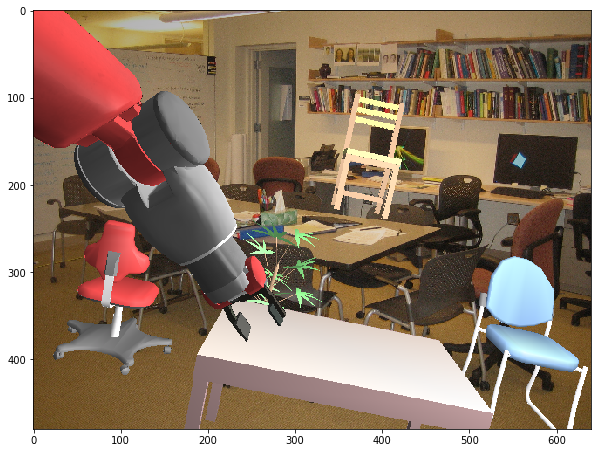

In [5]:
img = cv2.imread("exp_img.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img)

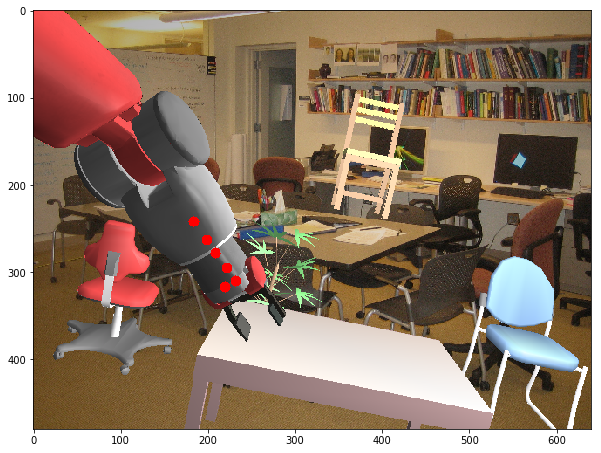

In [6]:
optimal_pids = [3, 10, 12, 13, 14, 15]

for pid in optimal_pids:
    
    point_3d_in_bl = baxter.get_3d_position_to_bl(pid,joint_angle)
    point_3d_in_cam = dehomogenize_3d(bl_to_cam @ point_3d_in_bl)
    point_2d_in_cam = get_coor_by_P(point_3d_in_cam)

    img = cv2.circle(img,point_2d_in_cam, 6, (255,0,0), -1)

plt.figure(figsize=(10,10))

plt.imshow(img)